# Install packages

# Import packages

In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

    
import sys
from data_wrangling import specific_utils
from null_behaviors import sample_null_distributions
from null_behaviors import show_null_trajectory
from data_wrangling import further_processing_class


import os, sys
import warnings
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from matplotlib import rc
from numpy import random
from importlib import reload
import seaborn as sns

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
done


/opt/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Retrieve monkey data

Note: it's better to use data aggregated across trials. See PatternsAndFeatures class. For now, we'll just use one session's data

In [30]:
PLAYER = "monkey"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
data_item = further_processing_class.FurtherProcessing(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()

data_item.make_or_retrieve_all_trial_patterns(exists_ok=True)
data_item.make_or_retrieve_pattern_frequencies(exists_ok=True)
data_item.make_or_retrieve_all_trial_features(exists_ok=True)
data_item.make_or_retrieve_feature_statistics(exists_ok=True)


all_trial_patterns = data_item.all_trial_patterns
all_trial_features = data_item.all_trial_features
pattern_frequencies = data_item.pattern_frequencies
feature_statistics = data_item.feature_statistics


Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0330/ff_dataframe.h5
When take out monkey subset for GUAT, 643 clusters out of 856 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 1338
Retrieved all_trial_patterns
Retrieved pattern_frequencies
Retrieved all_trial_features
Retrieved feature_statistics


# Null Scenario: Sampling Distributions of Features

We can compare the null distribution to the monkey's distribution

**Median time**: we can find that an ideal observer can get to fireflies at this speed. Then we can find the median time of the ideal observer, and express the median time of the monkey as a fraction of the median time of the ideal observer

**Assumptions**: assume fireflies are fully visible (or the ideal observer has perfect memory): calculate the median time of going from one firefly to the nearest firefly (or firefly that takes least amount of time). Also assume quadratic action cost; so constant velocity



### run function

In [22]:
reload(sample_null_distributions)

<module 'null_behaviors.sample_null_distributions' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/null_behaviors/sample_null_distributions.py'>

In [27]:
all_median_time, all_median_distance, all_median_abs_angle, all_median_abs_angle_boundary, \
all_mean_time, all_mean_distance, all_mean_abs_angle, all_mean_abs_angle_boundary, all_total_time = sample_null_distributions.sample_null_distributions_func()


0 out of 1000
100 out of 1000
200 out of 1000
300 out of 1000
400 out of 1000
500 out of 1000
600 out of 1000
700 out of 1000
800 out of 1000
900 out of 1000


In [ ]:
print(np.array(feature_statistics['label for median']))

In [25]:
all_null_distr = {'all_median_time': all_median_time,
                 'all_median_distance': all_median_distance,
                 'all_median_abs_angle': all_median_abs_angle, 
                 'all_median_abs_angle_boundary': all_median_abs_angle_boundary,
                 'all_mean_time': all_mean_time,
                 'all_mean_distance': all_mean_distance,
                 'all_mean_abs_angle':all_mean_abs_angle,
                 'all_mean_abs_angle_boundary': all_mean_abs_angle_boundary,
                 'all_total_time':all_total_time
}

Adding a line for monkey's statistic...so ugly...I can just print

In [ ]:
feature_statistics.Item

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                               t
1                  t_last_vis
2                  d_last_vis
3          abs_angle_last_vis
4              hitting_arena_edge
5                       num_stops
6    num_stops_since_last_vis
7           num_stops_near_target
8            num_ff_around_target
9                   n_ff_in_a_row
Name: Item, dtype: object

### Plot

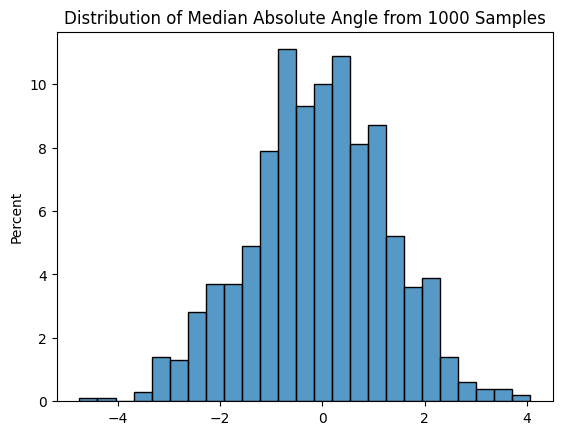

Monkey: 0.284692684313335


In [ ]:
import math
null_distr = all_median_abs_angle
item_name = 'abs_angle_last_vis'
median = feature_statistics.loc[feature_statistics['item']==item_name, 'median'].item()
sns.histplot(null_distr * 180/math.pi, stat='percent')

plt.title('Distribution of Median Absolute Angle Last Seen from 1000 Samples (with 1000 trials each sample)')
plt.show()
print('Monkey:', median)

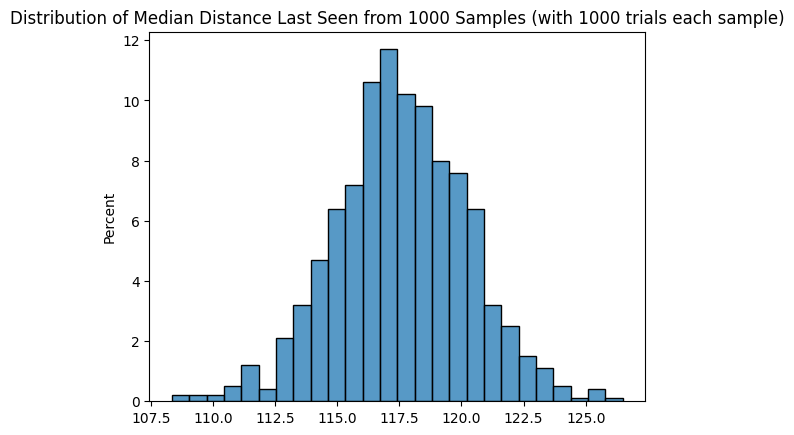

Monkey: 83.36280325639159


In [42]:
null_distr = all_median_distance
item_name = 'd_last_vis'
median = feature_statistics.loc[feature_statistics['item']==item_name, 'median'].item()
sns.histplot(null_distr, stat='percent')
plt.title('Distribution of Median Distance Last Seen from 1000 Samples (with 1000 trials each sample)')
plt.show()

print('Monkey:', median)

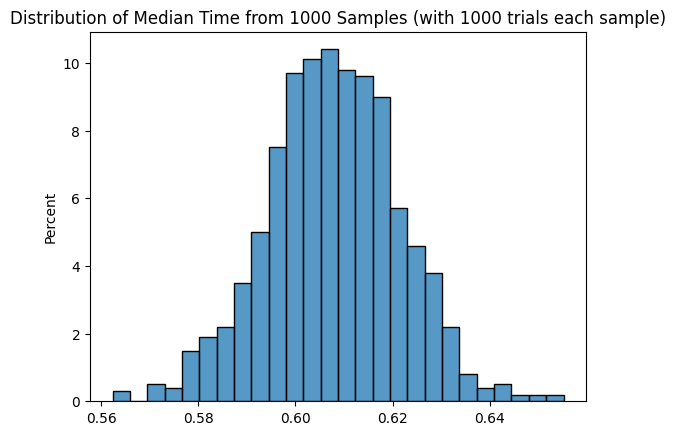

Monkey: 2.0085389999999848


In [43]:
median = feature_statistics.loc[feature_statistics['item']=='t', 'median'].item()
sns.histplot(all_median_time, stat='percent')
#plt.plot([median, median], [0, 1], linewidth=2)
plt.title('Distribution of Median Time from 1000 Samples (with 1000 trials each sample)')
plt.show()

print('Monkey:', median)


# Null Scenario: Population distribution of features

## Median abs angle

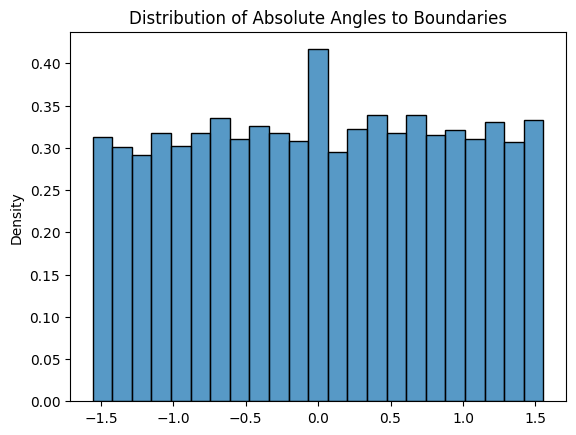

median_abs_angle is 0.7790760902103953
median_abs_angle_to_boundary is 0.7583480198427184


In [ ]:
# Plot distribution of median abs angles of sampled ff that are in front of the monkey (have a positive y coordinate)
num_alive_ff = 10000
arena_radius = 1000
fftheta = random.rand(num_alive_ff) * pi - pi/2
ffr = np.sqrt(random.rand(num_alive_ff)) * arena_radius
ffx = np.cos(fftheta) * ffr
ffy = np.sin(fftheta) * ffr
ffxy = np.stack((ffx, ffy), axis=1)
distances_to_ff = np.linalg.norm(ffxy, axis = 1)
angles_to_boundaries = specific_utils.calculate_angles_to_ff_boundaries(fftheta, distances_to_ff)

sns.histplot(fftheta, stat='density')
plt.title('Distribution of Absolute Angles')
plt.show() 
sns.histplot(angles_to_boundaries, stat='density')
plt.title('Distribution of Absolute Angles to Boundaries')
plt.show() 


# Also print the median of the absolute angles and the medians of the absoluate angles to boundary
median_abs_angle = np.median(np.abs(fftheta))
median_abs_angle_to_boundary = np.median(np.abs(angles_to_boundaries))
print("median_abs_angle is", median_abs_angle)
print("median_abs_angle_to_boundary is", median_abs_angle_to_boundary)

## Median distance

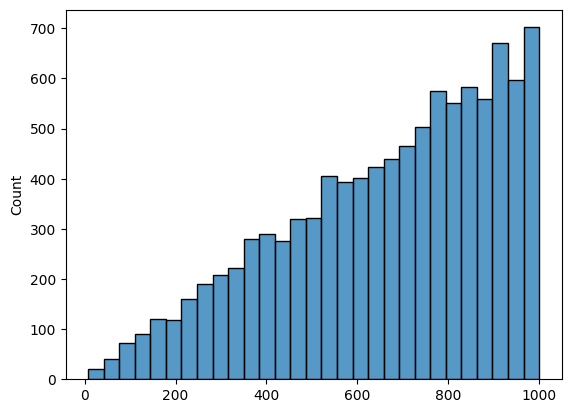

np.float64(706.3302389813366)

In [56]:
num_alive_ff = 10000
arena_radius = 1000
ffr = np.sqrt(random.rand(num_alive_ff)) * arena_radius
sns.histplot(ffr)
plt.show()
np.median(ffr)

# Null Scenario: Pattern Frequency

(['two_in_a_row', 'visible_before_last_one', 'disappear_latest', 'waste_cluster_around_target',
                                                                   'ignore_sudden_flash', 'give_up_after_trying', 'try_a_few_times', 'ff_capture_rate', 'stop_success_rate'])]

## two_in_a_row

Suppose the agent can pick up all fireflies in a row. Specifically, the agent will capture all the fireflies in a cluster and then move on to the next cluster, and so on (and a cluster can be just a single ff or multiple ff). 

So I guess this question comes to the percentage of clusters in the arena 

I can use algorithm from cluster_analysis.make_point_vs_cluster 

Here we set the max distance to be 50 cm for 2 ff to be considered in the same cluster

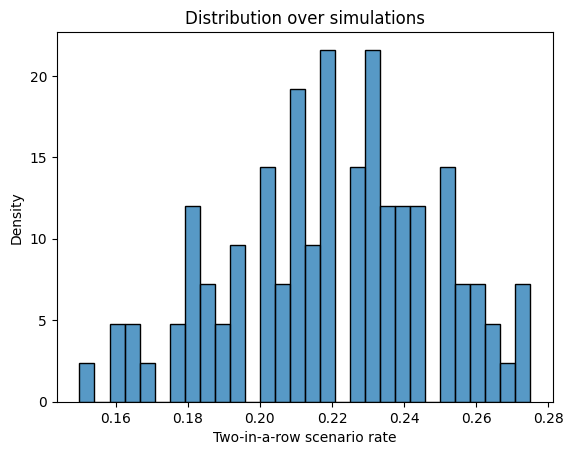

Median rate: 0.22


In [ ]:
import numpy as np
from numpy.random import default_rng
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

rng = default_rng(0)  # reproducible

max_cluster_distance = 50.0
num_samples = 100
num_alive_ff = 200
arena_radius = 1000.0

scenario_rates = []

for _ in range(num_samples):
    # Sample 200 fireflies uniformly in a disk of radius=arena_radius
    theta = rng.random(num_alive_ff) * 2 * pi
    r = np.sqrt(rng.random(num_alive_ff)) * arena_radius
    x = np.cos(theta) * r
    y = np.sin(theta) * r
    xy = np.column_stack((x, y))

    # Single-linkage clustering with a hard distance threshold
    model = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=max_cluster_distance,
        linkage="single",
        metric="euclidean",
    ).fit(xy)

    labels = model.labels_
    counts = np.bincount(labels)

     # for each cluster with n > 1 ff, we count n-1 ff to be categorized as 'two in a row'
    multi_counts = counts[counts > 1]
    two_in_a_row_rate = (multi_counts.sum() - len(multi_counts)) / num_alive_ff
    scenario_rates.append(two_in_a_row_rate)

scenario_rates = np.asarray(scenario_rates)

sns.histplot(scenario_rates, bins=30, stat="density")
plt.xlabel("Two-in-a-row scenario rate")
plt.ylabel("Density")
plt.title("Distribution over simulations")
plt.show()

print("Median rate:", float(np.median(scenario_rates)))
